In [151]:
import numpy as np
from numpy import linalg as LA
import struct
from array import array
import random
%matplotlib inline
import random
import matplotlib.pyplot as plt

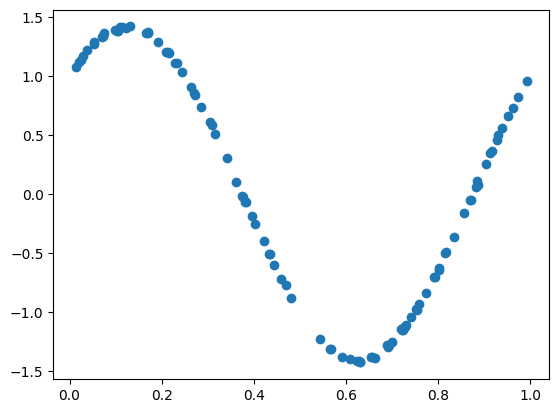

In [ ]:
np.random.seed(1231)
x = np.random.uniform(0,1,100)
eps = np.random.normal(0,0.01,100)
y = np.sin(2*np.pi*x) + np.cos(2*np.pi*x) + eps

traindata, trainlabels = x[0:80], y[0:80]
testdata, testlabels = x[80:100], y[80:100]

plt.scatter(x,y)

In [153]:
print(np.linspace(0,1,22)[1:-1])

[0.04761905 0.0952381  0.14285714 0.19047619 0.23809524 0.28571429
 0.33333333 0.38095238 0.42857143 0.47619048 0.52380952 0.57142857
 0.61904762 0.66666667 0.71428571 0.76190476 0.80952381 0.85714286
 0.9047619  0.95238095]


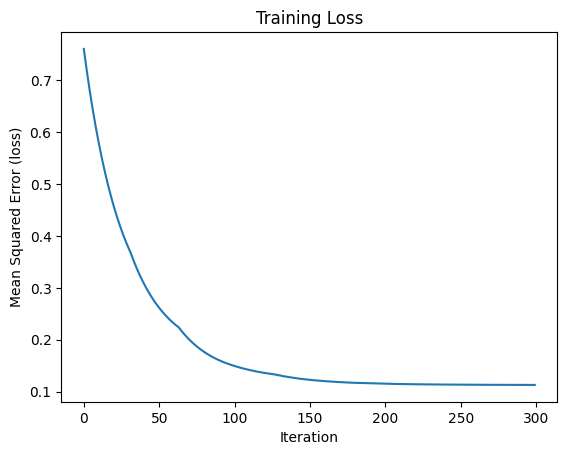

In [178]:
class Grad_boost:
    def __init__(self, trainx, trainy, learning_rate, n):
        self.x = trainx
        self.y = trainy
        self.lrate = learning_rate
        self.n = n
        self.trainplotx = np.arange(n)
        self.trainploty = []
        self.models = []  # to store weak learners
        self.splits = []  # to store split points

    def stump(self, split, labels):
        preds = np.ones(self.x.shape[0])
        lmask = self.x < split
        hl = np.mean(labels[lmask])
        hr = np.mean(labels[~lmask])
        preds[lmask] = hl
        preds[~lmask] = hr
        return preds, hl, hr

    # L(y,F) = sum (yi - F(xi))^2, dL/dF(xi) = -2*(yi-F(xi)), residue = -dL/dF(xi)
    def sqgrad(self, F):
        return 2*(self.y-F)
    #L(y,F) = |y-F|, dL/dF(xi) = sign(y-F(xi)), residue = -dL/dF(xi)
    def absgrad(self, F):
        return 1*np.sign(self.y-F)
    
    def fit(self, loss):
        F = np.full(self.y.shape, np.mean(self.y))  # initial prediction
        splits = np.linspace(0,1,22)[1:-1]
        for i in range(self.n):
            residues = self.sqgrad(F) if loss=='sq loss' else self.absgrad(F)
            min_e = float('inf')
            bestsplit = None
            for split in splits:
                preds, l, r = self.stump(split, residues)
                error = np.sum((self.y - preds)**2)
                if error<min_e:
                    min_e = error
                    bestsplit = split

            if bestsplit is not None :
                preds, l, r = self.stump(bestsplit, residues)
                self.models.append((l,r))
                self.splits.append(bestsplit)
                F = F + self.lrate*preds

            self.trainploty.append(np.mean((self.y - F)**2)) 

    def predict(self, x):
        Fx = np.full(x.shape[0], np.mean(self.y))
        for i in range(len(self.models)):
            preds = np.ones(x.shape[0])
            lmask = x<self.splits[i]
            preds[lmask] = self.models[i][0]
            preds[~lmask] = self.models[i][1]
            Fx+=self.lrate*preds
        
        return Fx

    
    def plot(self):
        plt.plot(self.trainplotx, self.trainploty)
        plt.xlabel('Iteration')
        plt.ylabel('Mean Squared Error (loss)')
        plt.title('Training Loss')
    
model1 = Grad_boost(traindata, trainlabels, 0.01, 300)
model1.fit('sq loss')
model1.plot()


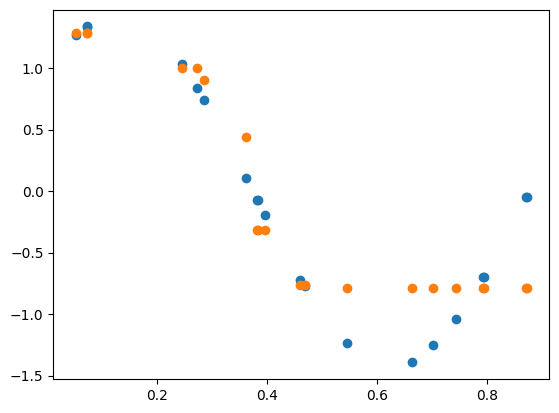

In [179]:
#ground truth vs predictions for training data
preds = model1.predict(traindata)
plt.scatter(traindata, trainlabels)
plt.scatter(traindata, preds)

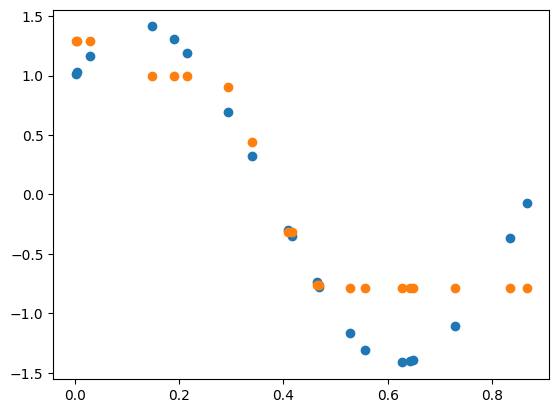

In [180]:
#ground truth vs predictions 
preds = model1.predict(testdata)
plt.scatter(testdata, testlabels)
plt.scatter(testdata, preds)

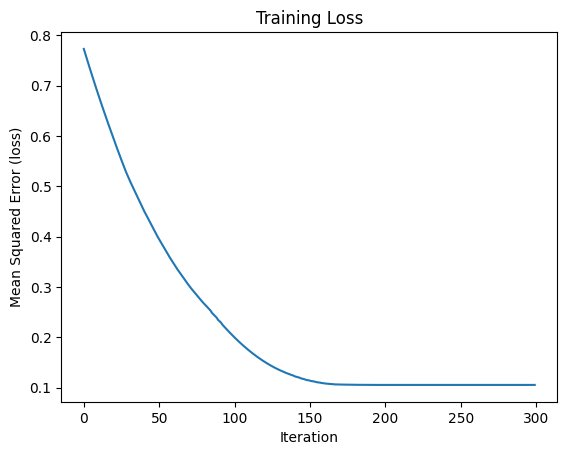

In [181]:
model2 = Grad_boost(traindata, trainlabels, 0.01, 300)
model2.fit('abs')
model2.plot()

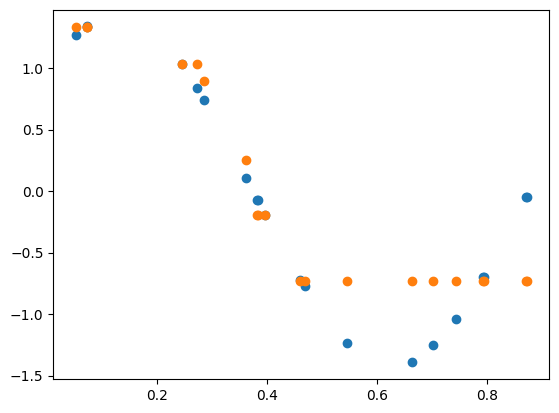

In [182]:
#ground truth vs predictions for training data
preds = model2.predict(traindata)
plt.scatter(traindata, trainlabels)
plt.scatter(traindata, preds)

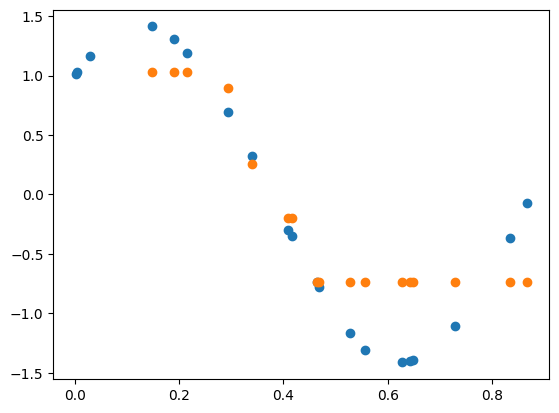

In [183]:
#ground truth vs predictions 
preds = model2.predict(testdata)
plt.scatter(testdata, testlabels)
plt.scatter(testdata, preds)